# GPyOpt: mixing different types of variables

### Javier Gonzalez, Amazon Research Cambridge.


*Last updated Monday, July 2017*

In this notebook we are going to see how to used GPyOpt to solve optimizaiton problems in which the domain of the fucntion is defined in terms of a variety of continous and discrete variables. To this end we start by loading GPyOpt. 

In [1]:
%pylab inline  
import GPyOpt
from numpy.random import seed
import numpy as np
seed(123)

Populating the interactive namespace from numpy and matplotlib


We will use the **Alpine1** function, that it is available in the benchmark of functions of the package. This function is defined for arbitrary dimension. In this example we will work in dimension 9. The functional form of the Alpine1 function is:

$$f(x_1,x_2,...,x_9)=\sum_{i=1}^{9} \lvert {x_i \sin \left( x_i \right) + 0.1 x_i} \rvert$$

We load the function from GPyOpt, assuming that noisy free values will be sampled.

In [2]:
func  = GPyOpt.objective_examples.experimentsNd.alpine1(input_dim=9) 

We will consider that variables $x_1$, $x_2$ and $x_3$ are continuous and defined in the interval $[-5,5]$, variable $x_9$ is takes continuous values in the interval $[-1,2]$, variable $x_3$ is discrete and takes values $\{3,8,10\}$, and finally $x_4$ is categorical with three different categories. Next we define this domain to use it in GPyOpt.

In [3]:
mixed_domain =[{'name': 'var1', 'type': 'continuous', 'domain': (-5,5),'dimensionality': 3},
               {'name': 'var3', 'type': 'discrete', 'domain': (3,8,10),'dimensionality': 2},
               {'name': 'var4', 'type': 'categorical', 'domain': (0,1,2),'dimensionality': 1},
               {'name': 'var5', 'type': 'continuous', 'domain': (-1,2)}]

In [4]:
myBopt = GPyOpt.methods.BayesianOptimization(f=func.f,                     # Objective function       
                                             domain=mixed_domain,          # Box-constraints of the problem
                                             initial_design_numdata = 5,   # Number data initial design
                                             acquisition_type='EI',        # Expected Improvement
                                             exact_feval = True)           # True evaluations, no sample noise

Now, we run the optimization for 20 iterations or a maximum of 60 seconds and we show the convergence plots.

In [5]:
max_iter = 20       ## maximum number of iterations
max_time = 60       ## maximum allowed time
eps      = 1e-6     ## tolerance, max distance between consicutive evaluations.

myBopt.run_optimization(max_iter,eps=0)

In [6]:
np.round(myBopt.X,2)

array([[-3.6 ,  1.95,  2.12, 10.  , 10.  ,  2.  ,  0.07],
       [-0.99,  0.94, -0.72,  8.  , 10.  ,  1.  ,  0.25],
       [ 1.27,  1.32, -2.02, 10.  ,  8.  ,  0.  ,  0.96],
       [-1.76, -0.6 , -0.08, 10.  , 10.  ,  1.  ,  0.12],
       [-2.55, -4.16,  2.4 ,  3.  ,  8.  ,  2.  , -0.3 ],
       [-1.74, -0.78, -0.23, 10.  , 10.  ,  1.  ,  0.06],
       [-1.93, -0.98,  0.62, 10.  , 10.  ,  1.  ,  0.36],
       [-2.38, -0.18, -0.17, 10.  , 10.  ,  1.  , -0.33],
       [-2.74, -0.09, -0.7 , 10.  , 10.  ,  1.  ,  0.65],
       [-4.32, -0.19, -2.13, 10.  , 10.  ,  1.  , -0.78],
       [-2.35, -0.07, -0.26, 10.  , 10.  ,  1.  ,  0.29],
       [ 5.  ,  5.  ,  5.  ,  3.  ,  3.  ,  2.  , -1.  ],
       [-2.32, -0.22, -0.22, 10.  ,  8.  ,  1.  , -0.08],
       [ 5.  , -5.  , -5.  ,  3.  ,  3.  ,  2.  ,  2.  ],
       [-2.83, -0.45, -0.98, 10.  , 10.  ,  1.  ,  2.  ],
       [ 5.  , -5.  ,  5.  , 10.  ,  3.  ,  1.  , -1.  ],
       [-5.  ,  5.  , -5.  ,  3.  ,  3.  ,  0.  ,  2.  ],
       [-2.3 ,

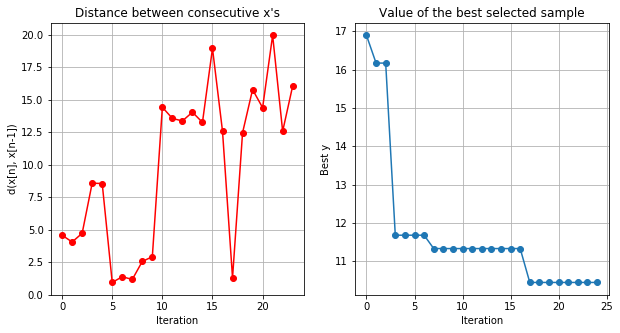

In [7]:
myBopt.plot_convergence()